<a href="https://colab.research.google.com/github/ajallen2323/MLB-Shifts/blob/main/MLBShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/MLBShift .csv')

In [ ]:
df.head()

,Year,Team,PA_against,Total Shifts,%,RHH_PA_against,RHH_Shifts,RHH_%,RHH_wOBA,LHH_PA_against,...,Barrels,Barrel %,Hard Hit %,Exit Velocity,Launch Angle,XBA,XSLG,XWOBA,XWOBACON,Win %
0,2022,Dodgers,5849,3048,52.1,3758,1575,41.9,0.299,2091,...,388,9.2,41.9,89.5,15.8,0.246,0.423,0.330,0.382,0.685
1,2022,Astros,5847,2945,50.4,3262,824,25.3,0.280,2585,...,346,8.1,39.1,88.7,14.2,0.249,0.412,0.324,0.364,0.654
2,2022,Blue Jays,6033,3036,50.3,3404,1459,42.9,0.329,2629,...,368,8.5,44.3,90.2,11.2,0.257,0.418,0.326,0.374,0.568
3,2022,Mariners,5946,2693,45.3,3636,1231,33.9,0.325,2310,...,327,8.1,36.7,88.2,15.0,0.236,0.393,0.317,0.364,0.556
4,2022,Marlins,6032,2649,43.9,3606,1303,36.1,0.329,2426,...,282,7.0,37.2,88.2,10.9,0.236,0.373,0.299,0.356,0.426


In [ ]:
df.isnull().any()

Year              False
Team              False
PA_against        False
Total Shifts      False
%                 False
RHH_PA_against    False
RHH_Shifts        False
RHH_%             False
RHH_wOBA          False
LHH_PA_against    False
LHH_Shifts        False
LHH_%             False
LHH_wOBA          False
PA                False
AB                False
H                 False
2B                False
3B                False
HR                False
BB                False
SO                False
BA                False
OBP               False
SLG               False
WOBA              False
WOBACON           False
Pitches           False
Batted Balls      False
Barrels           False
Barrel %          False
Hard Hit %        False
Exit Velocity     False
Launch Angle      False
XBA               False
XSLG              False
XWOBA             False
XWOBACON          False
Win %             False
dtype: bool

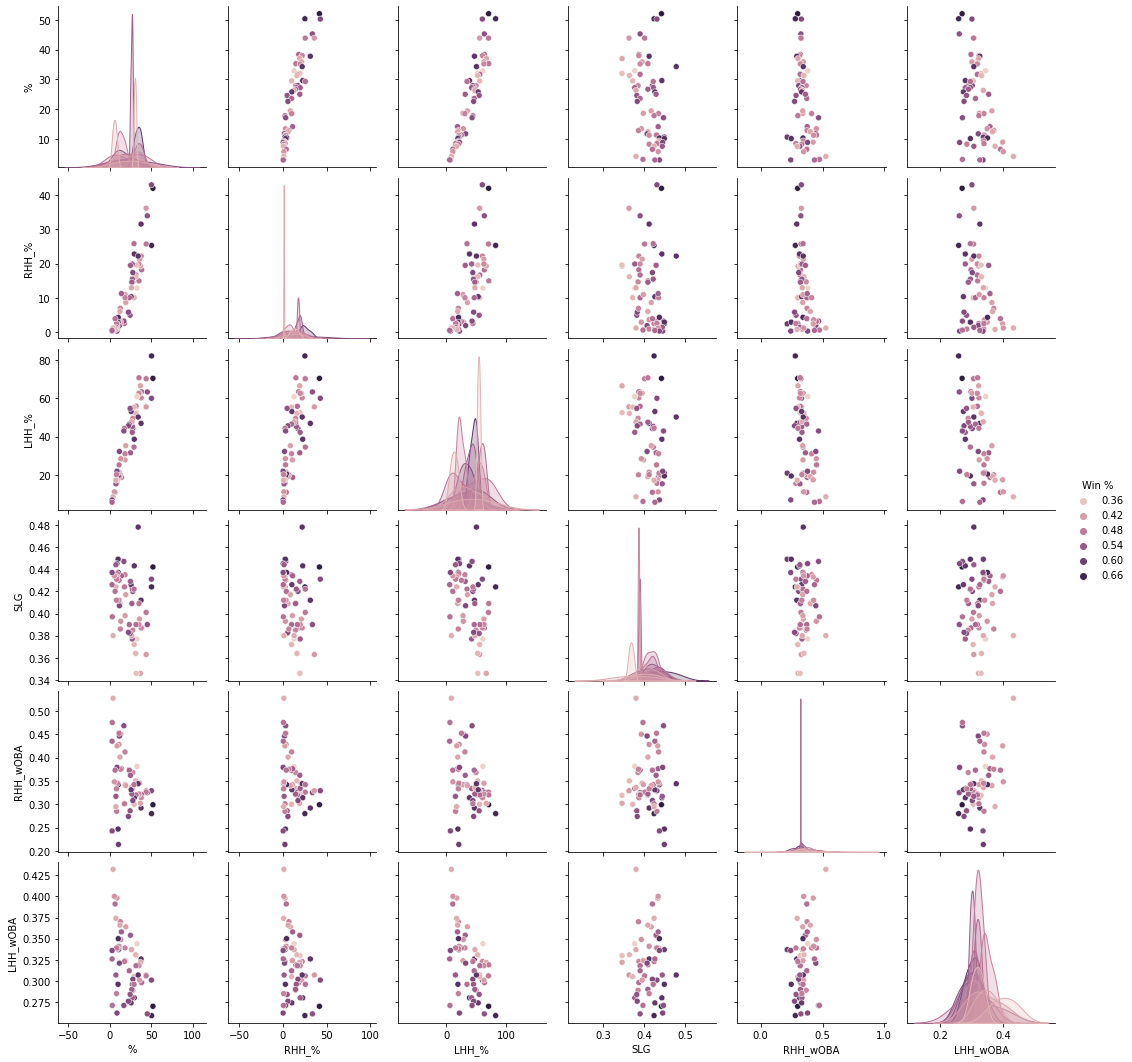

In [ ]:
baseball = ['%', 'RHH_%', 'LHH_%', 'SLG', 'Win %', 'RHH_wOBA', 'LHH_wOBA']
ppltdata = df[baseball]
pp = sns.pairplot(ppltdata, hue = 'Win %')

In [ ]:
from bokeh.models import ColumnDataSource, Range1d
source_df = ColumnDataSource(df)

from bokeh.io import output_notebook, show
output_notebook()

from bokeh.plotting import figure
p1 = figure(title = 'How Shift % affects Win %')
p1.circle('RHH_%', 'Win %', source = source_df, color = 'green', size = 5, legend = dict(value = 'RHH'))
p1.triangle('LHH_%', 'Win %', source = source_df, color = 'red', size = 5, legend = dict(value = 'LHH'))
p1.legend.location = 'top_left'

show(p1)

In [ ]:
df.corr(method='kendall')

,Year,PA_against,Total Shifts,%,RHH_PA_against,RHH_Shifts,RHH_%,RHH_wOBA,LHH_PA_against,LHH_Shifts,...,Barrels,Barrel %,Hard Hit %,Exit Velocity,Launch Angle,XBA,XSLG,XWOBA,XWOBACON,Win %
Year,1.000000,-0.290940,0.657613,0.661530,0.102236,0.597735,0.590520,-0.342452,-0.218007,0.671874,...,0.343149,0.409285,0.603752,0.558752,0.218047,-0.365170,-0.413431,-0.272902,-0.257889,-0.007200
PA_against,-0.290940,1.000000,-0.232900,-0.246746,0.061634,-0.254525,-0.250072,0.241497,0.262443,-0.191068,...,-0.273732,-0.281158,-0.286040,-0.309303,-0.219059,-0.009734,-0.074454,-0.170229,-0.137286,-0.502304
Total Shifts,0.657613,-0.232900,1.000000,0.986426,0.026561,0.777841,0.776994,-0.250426,-0.134539,0.824859,...,0.301898,0.335828,0.456044,0.438504,0.126330,-0.237502,-0.223235,-0.150786,-0.098494,0.030806
%,0.661530,-0.246746,0.986426,1.000000,0.026591,0.784380,0.783548,-0.257516,-0.143746,0.819005,...,0.304508,0.338495,0.461104,0.441293,0.132196,-0.240062,-0.222351,-0.149818,-0.097466,0.039979
RHH_PA_against,0.102236,0.061634,0.026561,0.026591,1.000000,0.036754,0.009070,0.084443,-0.676845,0.032212,...,0.109915,0.152536,0.087944,0.134566,0.190979,-0.154563,-0.030682,-0.059193,0.018224,-0.077036
RHH_Shifts,0.597735,-0.254525,0.777841,0.784380,0.036754,1.000000,0.975336,-0.216554,-0.145928,0.602600,...,0.279400,0.324589,0.406359,0.403239,0.153856,-0.213586,-0.192671,-0.130376,-0.057535,0.070779
RHH_%,0.590520,-0.250072,0.776994,0.783548,0.009070,0.975336,1.000000,-0.217675,-0.119649,0.603573,...,0.286364,0.324845,0.405690,0.401398,0.146221,-0.200928,-0.183476,-0.122147,-0.050258,0.076110
RHH_wOBA,-0.342452,0.241497,-0.250426,-0.257516,0.084443,-0.216554,-0.217675,1.000000,0.055556,-0.247026,...,-0.227776,-0.217647,-0.281001,-0.235374,-0.098599,-0.031565,-0.002279,-0.082740,-0.029118,-0.203666
LHH_PA_against,-0.218007,0.262443,-0.134539,-0.143746,-0.676845,-0.145928,-0.119649,0.055556,1.000000,-0.115319,...,-0.239728,-0.280015,-0.211125,-0.270926,-0.292269,0.117387,-0.024439,-0.039284,-0.101968,-0.167815
LHH_Shifts,0.671874,-0.191068,0.824859,0.819005,0.032212,0.602600,0.603573,-0.247026,-0.115319,1.000000,...,0.274711,0.308413,0.443566,0.428200,0.104608,-0.235213,-0.258453,-0.187202,-0.146318,-0.005705


In [ ]:
df.isnull().any()

Year              False
Team              False
PA_against        False
Total Shifts      False
%                 False
RHH_PA_against    False
RHH_Shifts        False
RHH_%             False
RHH_wOBA          False
LHH_PA_against    False
LHH_Shifts        False
LHH_%             False
LHH_wOBA          False
PA                False
AB                False
H                 False
2B                False
3B                False
HR                False
BB                False
SO                False
BA                False
OBP               False
SLG               False
WOBA              False
WOBACON           False
Pitches           False
Batted Balls      False
Barrels           False
Barrel %          False
Hard Hit %        False
Exit Velocity     False
Launch Angle      False
XBA               False
XSLG              False
XWOBA             False
XWOBACON          False
Win %             False
dtype: bool

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


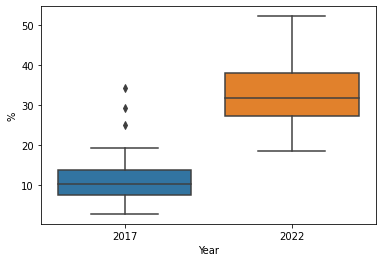

In [ ]:
sns.boxplot('Year','%', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


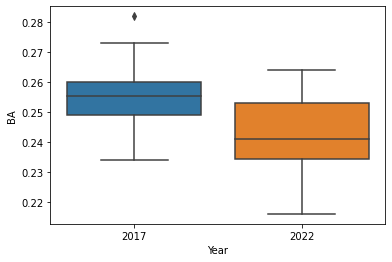

In [ ]:
sns.boxplot('Year', 'BA', data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


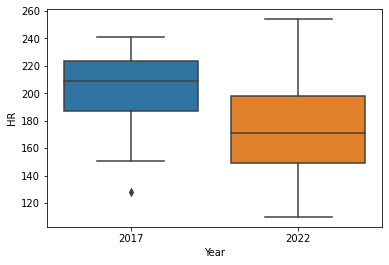

In [ ]:
sns.boxplot('Year', 'HR', data=df)

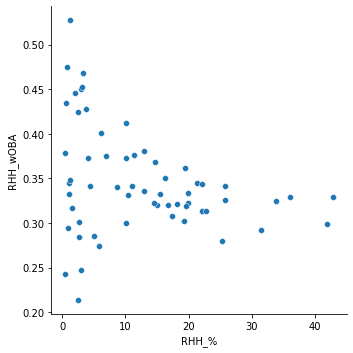

In [ ]:
g = sns.relplot(data=df, x='RHH_%', y='RHH_wOBA')

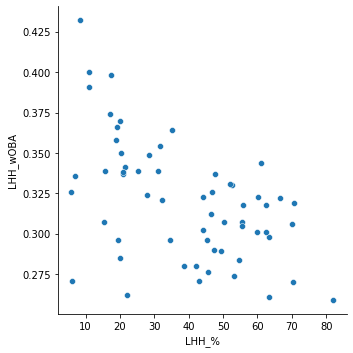

In [ ]:
d = sns.relplot(data=df, x='LHH_%', y='LHH_wOBA')

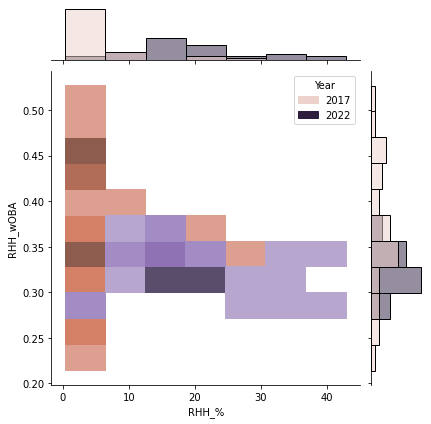

In [ ]:
sns.jointplot(data=df, x= 'RHH_%', y = 'RHH_wOBA', hue = 'Year', kind="hist")

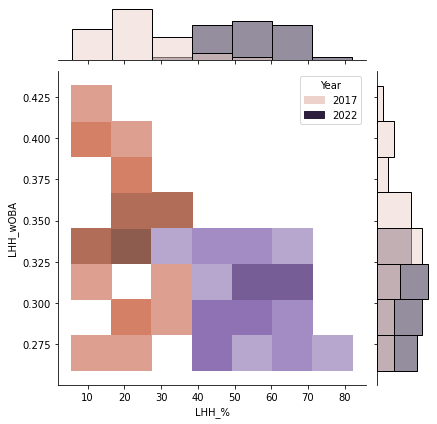

In [ ]:
sns.jointplot(data=df, x= 'LHH_%', y = 'LHH_wOBA', hue = 'Year', kind="hist")

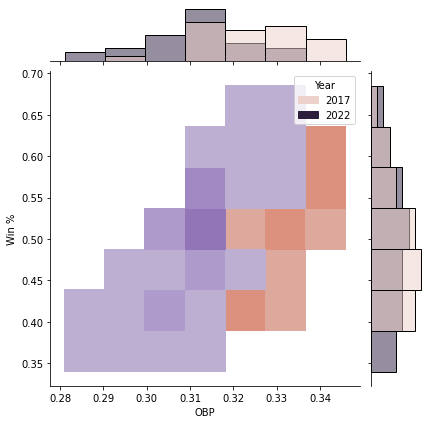

In [ ]:
sns.jointplot(data=df, x = 'OBP', y = 'Win %', hue = 'Year', kind="hist")

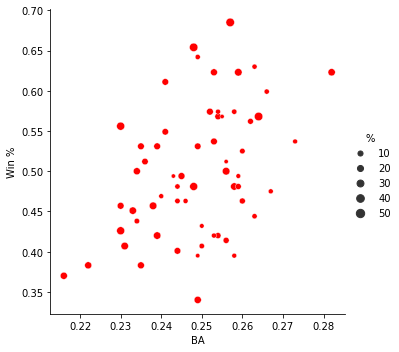

In [ ]:
sns.relplot(data=df, x='BA', y='Win %', size='%', color = 'red')

In [ ]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

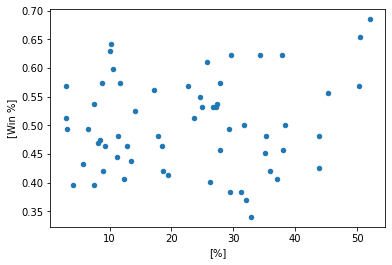

In [ ]:
df.plot.scatter(['%'], ['Win %'])

-0.09954050841459994


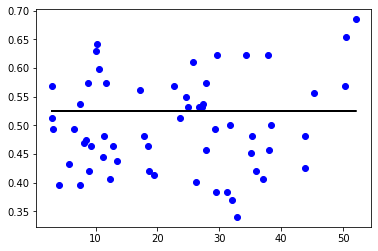

In [ ]:
X = np.array(df['%']).reshape(-1, 1)
y = np.array(df['Win %']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.98)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

Large variance of regression scores show data is not really suited for linear regression or we don't have a large enough sample size.

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1463050847457627
Mean Squared Error: 0.02703701694915255
Root Mean squared Error: 0.16442936766025876
